In [ ]:
from pickle import load
import tensorflow as tf
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.applications import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model
from keras.models import Model
import matplotlib.pyplot as plt 
import matplotlib.image as img 

In [ ]:
import sys
import os

py_file_location = '/content/drive/MyDrive/ImageCaptioningProject/Notebooks/FinalizedNotebooks'
sys.path.append(os.path.abspath(py_file_location))

import HelperFunctions as helper

In [ ]:
# extract features of new uncaptioned photos
def extractImageFeatures(filename):
  # load model
  features_model = InceptionV3()
  # omitting unneccessary classification layer
  features_model = Model(inputs=features_model.inputs, outputs=features_model.layers[-2].output)
  # load photo
  image = load_img(filename, target_size=(299, 299))
  # convert image pixels to numpy array
  image = img_to_array(image)
  # reshape image array for model input
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2])) 
  # prepare image for CNN. Normalizes image array to range [-1, 1], matching format of images used to train InceptionV3
  image = preprocess_input(image)
  # get image features
  feature = features_model.predict(image, verbose=0)
  return feature

In [ ]:
# Load model and extract new image features
saved_model = load_model('/content/drive/MyDrive/ImageCaptioningProject/FinalizedModels/TextModels/model-ep006-loss3.360-val_loss3.612')

# Load uncaptioned image
img_filename = '/content/drive/MyDrive/ImageCaptioningProject/uncaptioned_images/example1.jpg'
img_feats = extractImageFeatures(img_filename)

# Previously defined - consistent throughout dataset
max_length = 34 

96116736/96112376 [==============================] - 1s 0us/step


dog is running through the grass


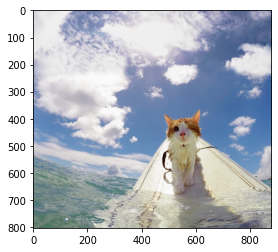

In [ ]:
# Loading the previously saved word-to-index dictionary and index-to-word dictionary
wordtoix = load(open('/content/drive/MyDrive/ImageCaptioningProject/FinalizedModels/TextModels/wordtoix.pkl', 'rb'))
ixtoword = load(open('/content/drive/MyDrive/ImageCaptioningProject/FinalizedModels/TextModels/ixtoword.pkl', 'rb'))

description = helper.generateDesc(saved_model, wordtoix, ixtoword, img_feats, max_length)

# Show uncaptioned image
image = img.imread(img_filename) 
plt.imshow(image) 

# Removing start and end flags
print(' '.join(description.split()[1:-1]))